In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import os
import scipy.stats

language = "es"
data_folder = "data"

## 1. Encoder self-attention

In [3]:
os.mkdir("figures_precomputed")
for language in ["nl", "de", "sv", "da", "fr", "it", "es"]:
    if not os.path.exists(f"figures_precomputed/{language}"):
        os.mkdir(f"figures_precomputed/{language}")

FileExistsError: [Errno 17] File exists: 'figures_precomputed'

36412.0


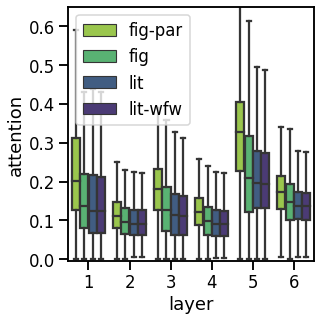

36412.0


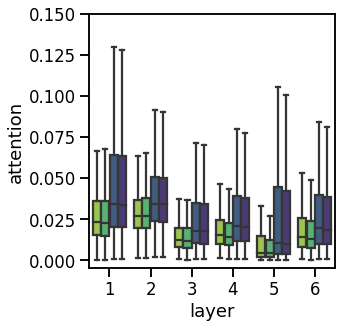

36412.0


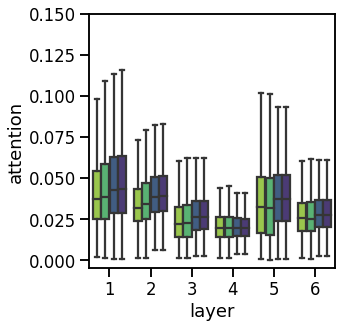

10591.0


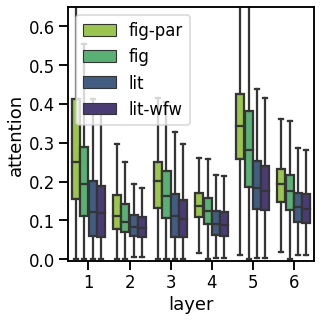

10591.0


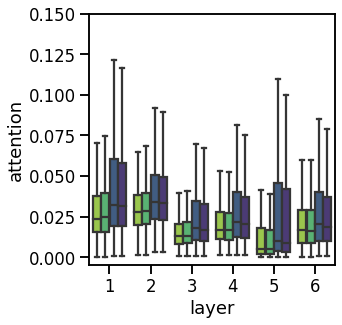

10591.0


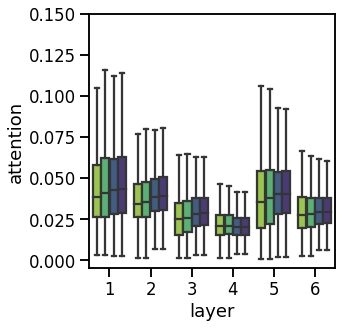

17161.0


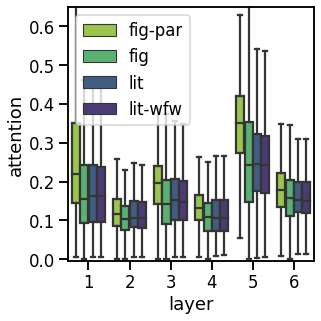

17161.0


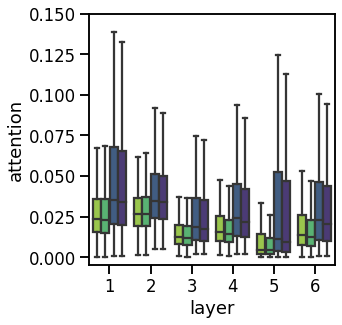

17161.0


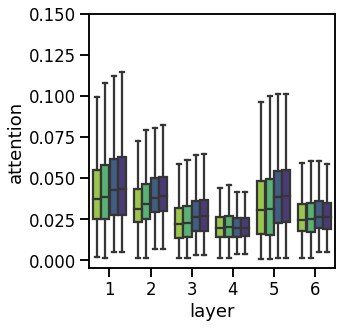

In [22]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)
for input_file in [f"{data_folder}/{language}/attention.pickle", f"data/{language}/attention_subset=intersection.pickle",
                   f"{data_folder}/{language}/attention_subset=identical.pickle"]:
    per_setup = pickle.load(open(input_file, 'rb'))
    setups = [("figurative", "paraphrase"), "figurative", "literal", ("literal", "word-by-word")]
    labels = ["fig-par", "fig", "lit", "lit-wfw"]

    for graph, maxi in [("idi2idi", 0.65), ("idi2con", 0.15), ("con2idi", 0.15)]:
        fig = plt.figure(figsize=(4.5, 4.5))
        data, layers, hue = [], [], []

        for i, setup in enumerate(setups):
            data.extend([x for l in range(6) for x in per_setup[l][graph][setup]])
            layers.extend([l for l in range(6) for x in per_setup[l][graph][setup]])
            hue.extend([labels[i] for l in range(6) for x in per_setup[l][graph][setup]])
        print((len([x for l in range(6) for x in per_setup[l][graph]["figurative"]]) + \
               len([x for l in range(6) for x in per_setup[l][graph]["literal"]]))/6)
        ax = sns.boxplot(x=layers, y=data, hue=hue,
                         palette=[colors[-1], colors[-2], colors[1], colors[0]],
                         fliersize=0)

        plt.tight_layout()
        if graph == "idi2idi":
            plt.legend(loc='upper left') #bbox_to_anchor=(0.1, 0.75))
        else:
            plt.legend([],[], frameon=False)
        ax.set_xticks([0, 1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5, 6])
        plt.xlabel("layer")
        plt.ylabel("attention")
        plt.ylim(-0.005, maxi)
        plt.savefig(input_file.replace(data_folder, "figures").replace(".pickle", "") + f"_{graph}.pdf", bbox_inches="tight")
        plt.show()

## 2. Cross-attention

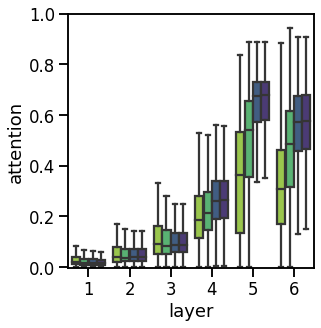

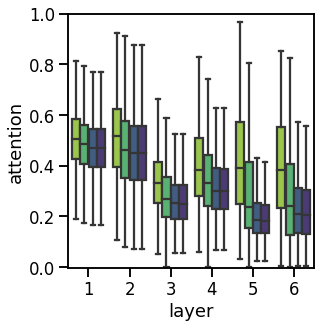

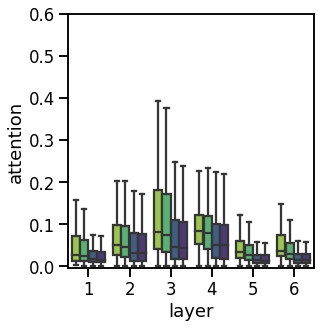

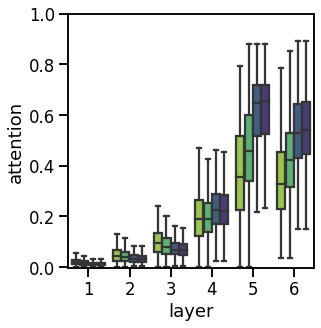

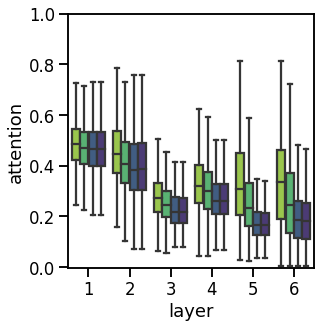

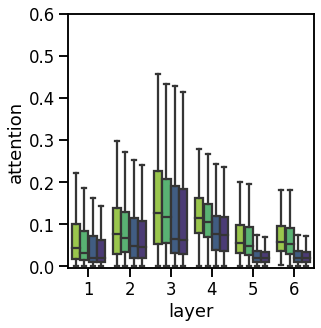

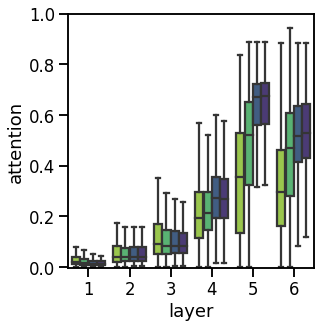

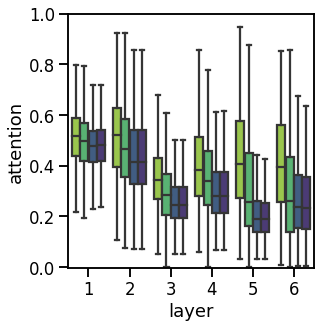

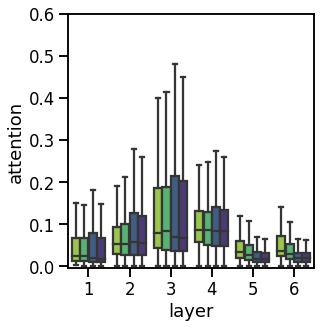

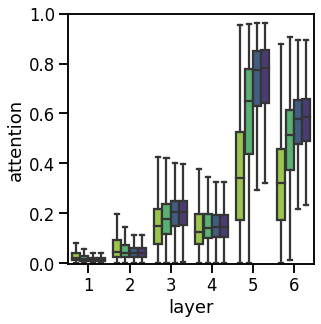

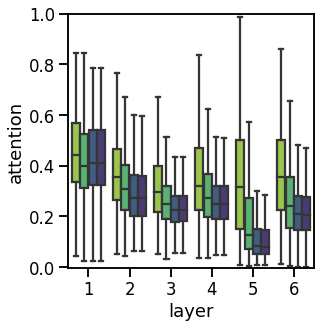

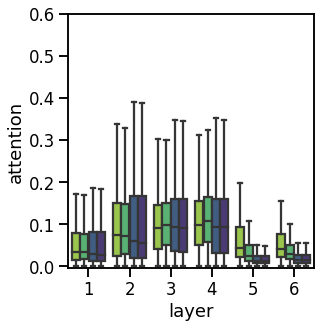

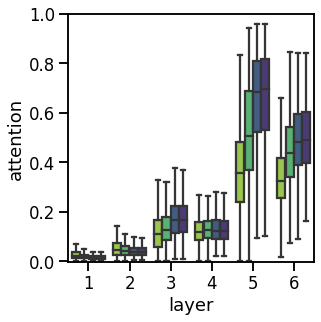

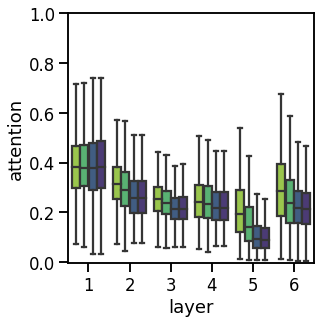

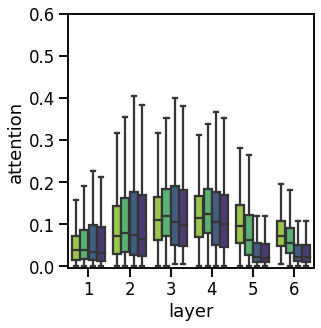

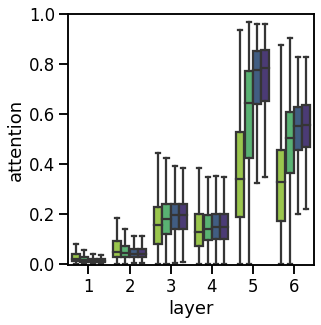

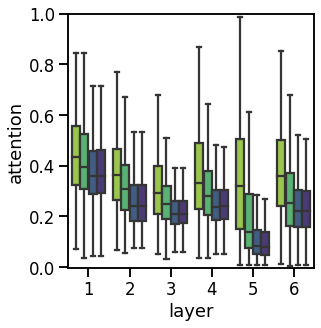

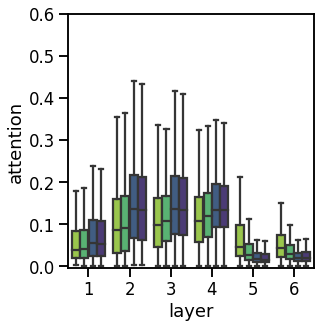

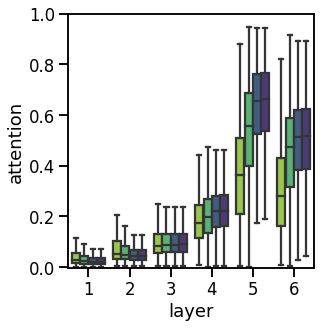

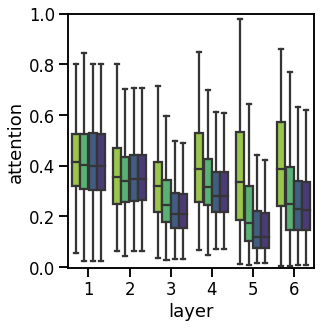

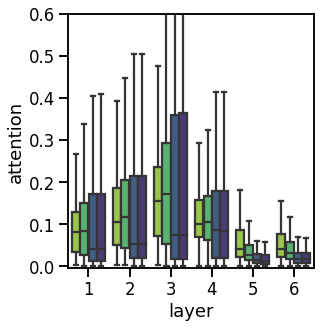

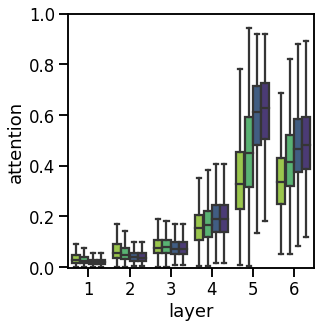

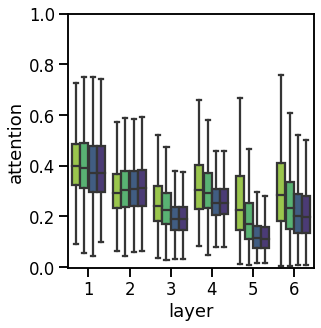

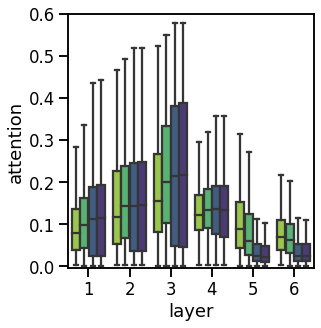

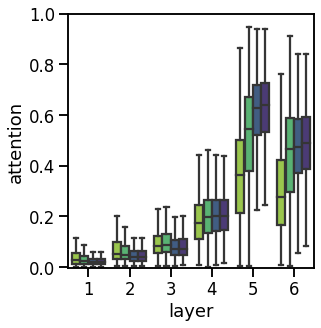

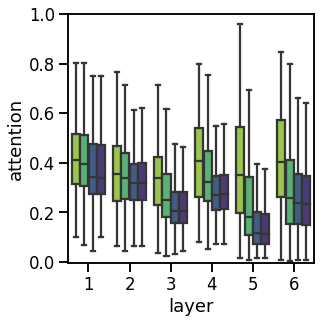

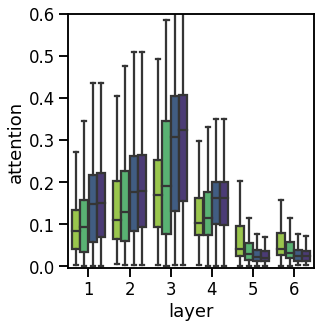

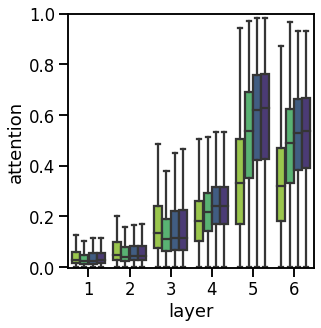

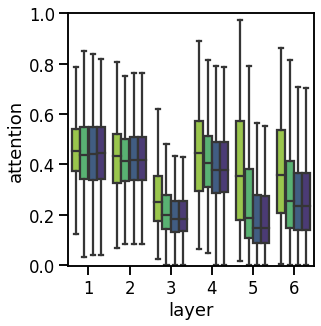

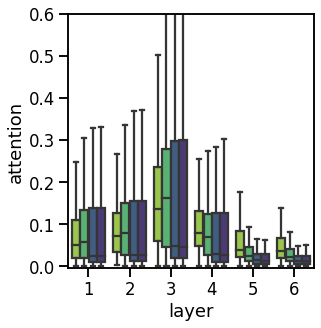

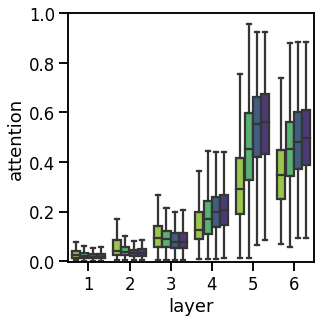

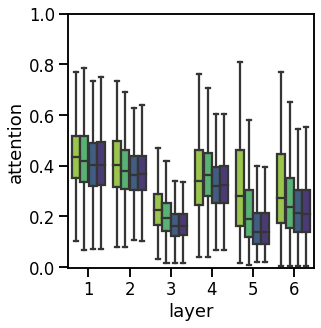

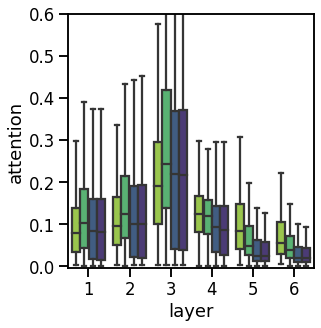

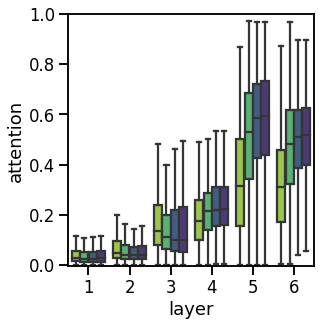

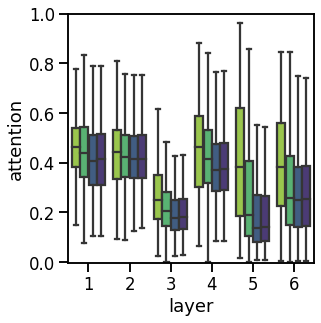

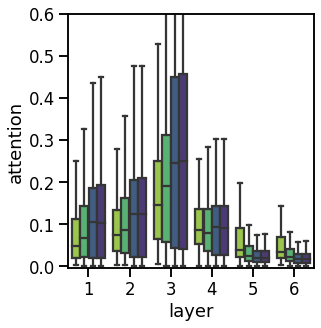

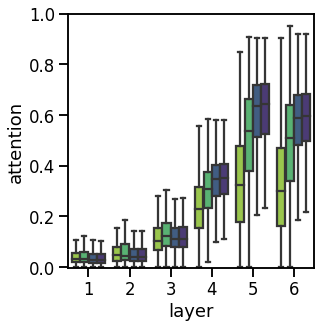

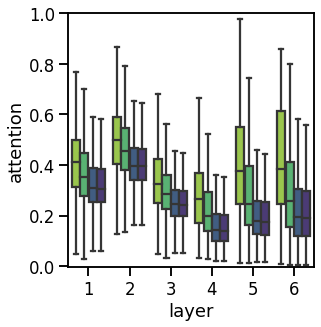

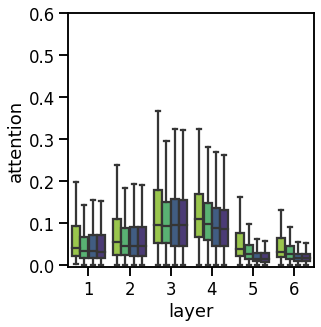

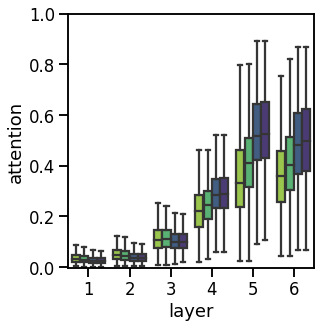

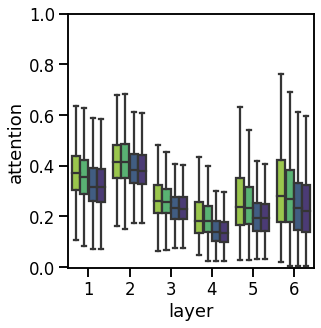

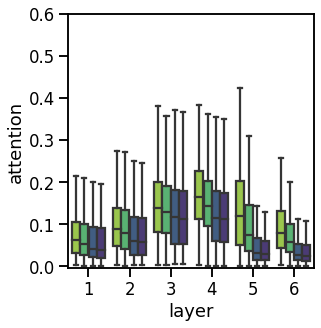

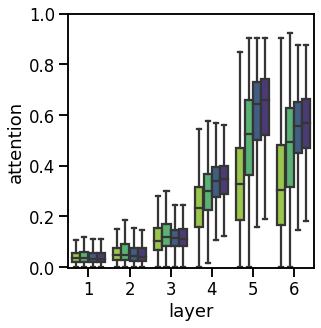

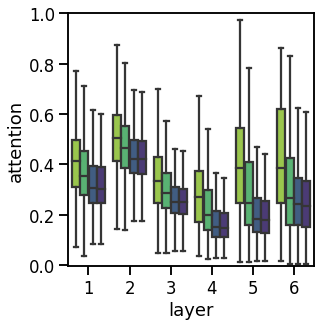

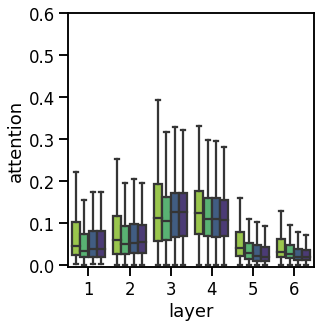

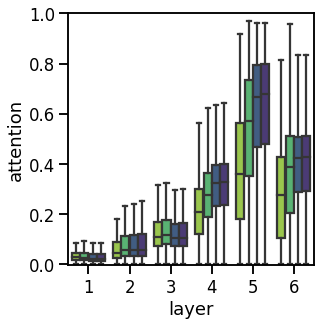

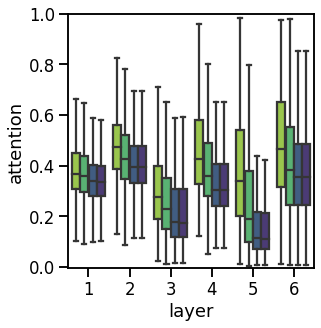

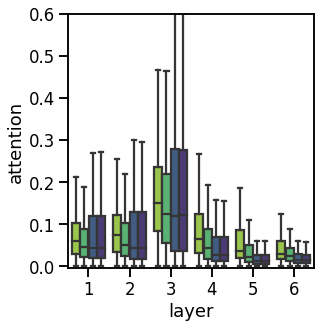

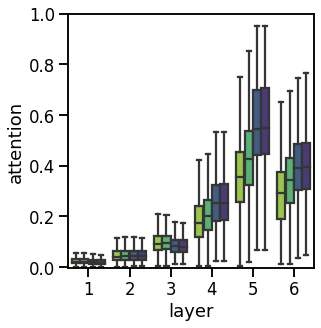

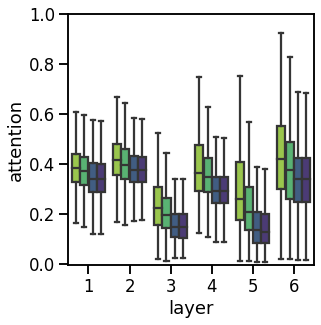

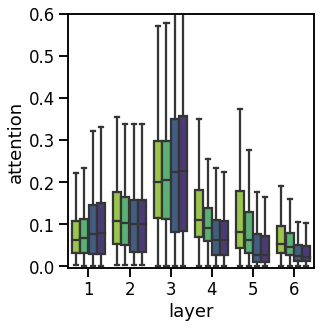

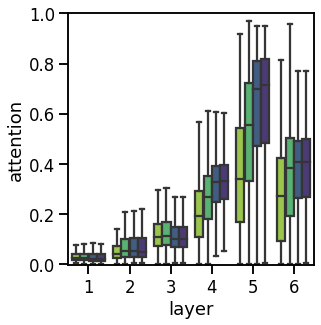

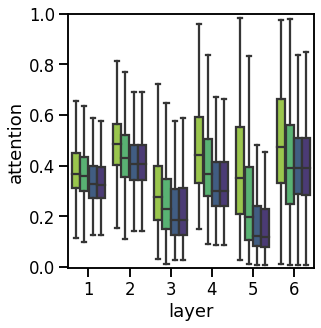

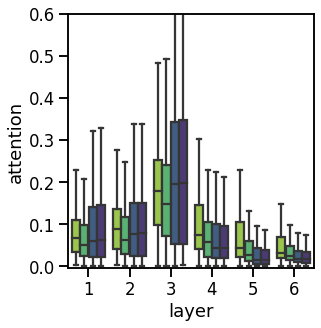

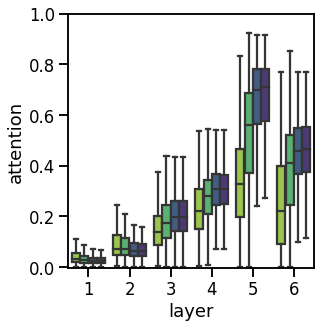

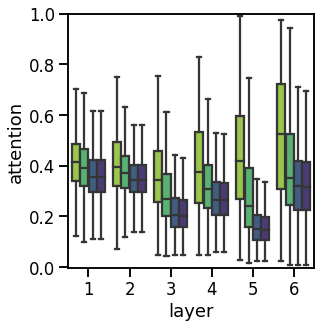

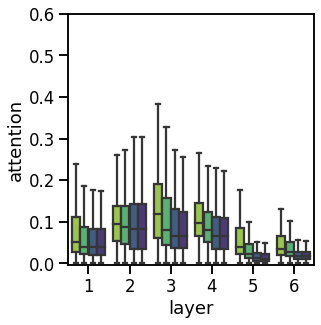

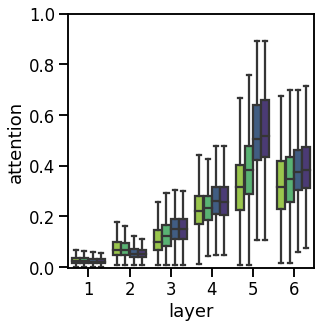

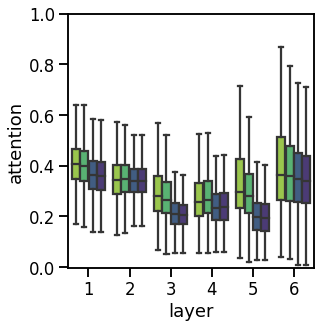

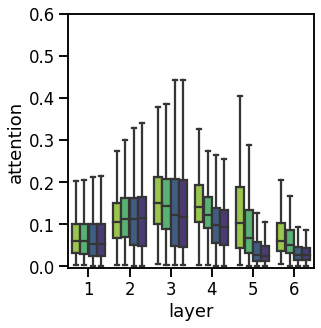

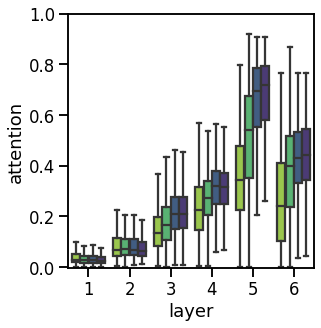

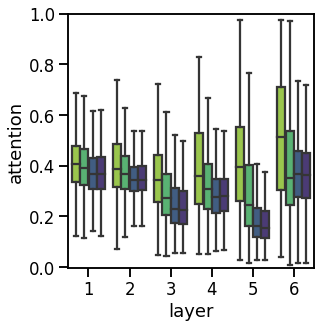

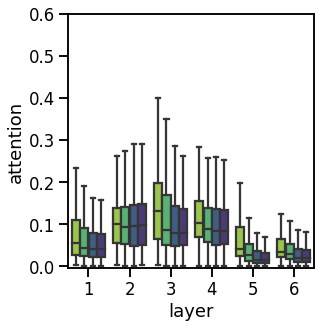

In [23]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)
language = "nl"

data_folder = "data_precomputed"
for language in ["nl", "de", "sv", "da", "fr", "it", "es"]:
    for input_file in [f"{data_folder}/{language}/cross_attention.pickle", f"data/{language}/cross_attention_subset=intersection.pickle",
                       f"{data_folder}/{language}/cross_attention_subset=identical.pickle"]:
        per_setup = pickle.load(open(input_file, 'rb'))
        for graph, maxi in [("idi2idi", 1), ("idi2eos", 1), ("idi2con", 0.6)]:
            fig = plt.figure(figsize=(4.5, 4.5))
            data, layers, hue = [], [], []
            for i, setup in enumerate(setups):
                data.extend([x for l in range(6) for x in per_setup[l][graph][setup]])
                layers.extend([l for l in range(6) for x in per_setup[l][graph][setup]])
                hue.extend([labels[i] for l in range(6) for x in per_setup[l][graph][setup]])

            ax = sns.boxplot(x=layers, y=data, hue=hue,
                             palette=[colors[-1], colors[-2], colors[1], colors[0]],
                             fliersize=0)
            plt.tight_layout()
            plt.legend([],[], frameon=False)
            ax.set_xticks([0, 1, 2, 3, 4, 5])
            ax.set_xticklabels([1, 2, 3, 4, 5, 6])
            plt.xlabel("layer")
            plt.ylabel("attention")
            plt.ylim(-0.005, maxi)
            plt.savefig(input_file.replace(data_folder, "figures_precomputed").replace(".pickle", "") + \
                        f"_{graph}.pdf", bbox_inches="tight")
            plt.show()

## 3. Comparison across languages

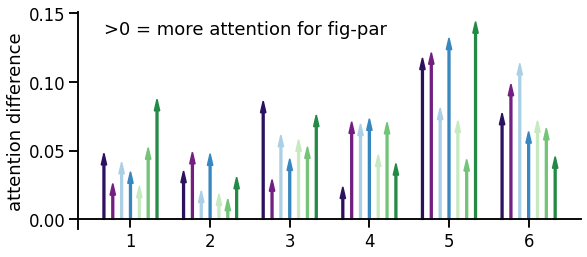

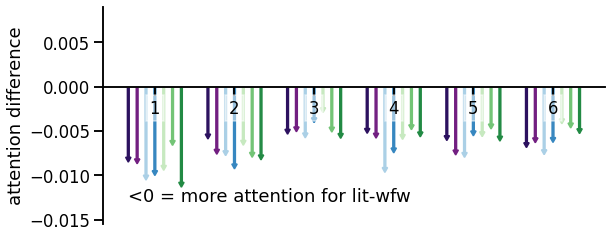

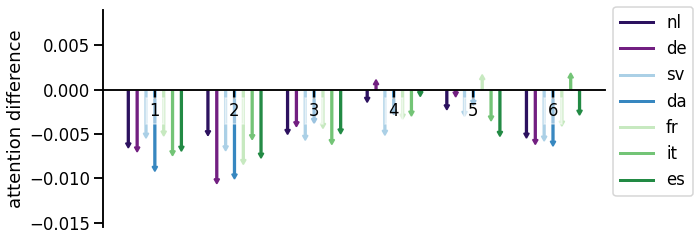

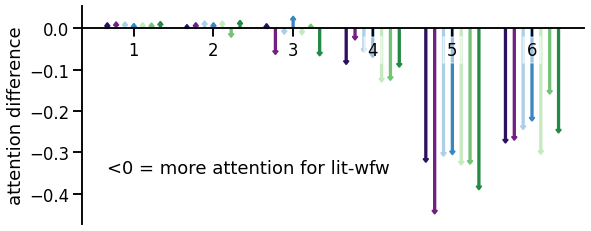

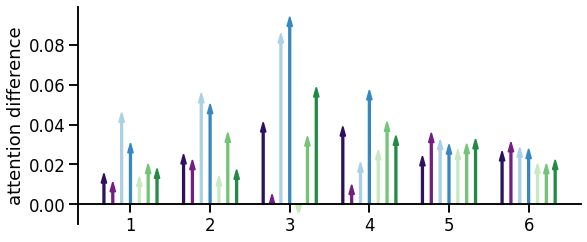

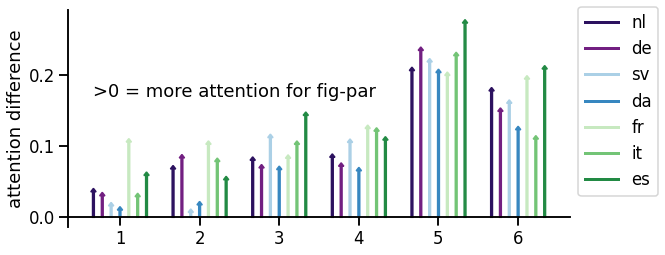

In [6]:
from matplotlib.lines import Line2D
sns.set_context("talk")

languages = ['nl', 'de', 'sv', 'da', 'fr', 'it', 'es']
attention_type = "attention"

for attention_type in ["attention", "cross_attention"]:
    if attention_type == "attention":
        data_folder = "data"
        setups = [("idi2idi", None, 0.14),
                  ("idi2con", -0.0155, 0.009),
                  ("con2idi", -0.0155, 0.009)]
    else:
        data_folder = "data_precomputed"
        setups = [("idi2idi", None, 0.14),
                  ("idi2con", None, 0.08),
                  ("idi2eos", None, 0.08)]

    for setup, min_, max_ in setups:
        x, y, style, colour, labels = [], [], [], [], []
        for k, language in enumerate(languages):
            per_setup = pickle.load(open(f"{data_folder}/{language}/{attention_type}.pickle", 'rb'))
            for l in range(6):
                data, layers, hue = [], [], []
                fig_par = [x for x in per_setup[l][setup][("figurative", "paraphrase")] if not math.isnan(x)]
                lit_wfw = [x for x in per_setup[l][setup][("literal", "word-by-word")] if not math.isnan(x)]
                a, b, c = np.percentile(fig_par, [25, 50, 75])
                d, e, f = np.percentile(lit_wfw, [25, 50, 75])
                x.append(l * (len(languages) + 2) + k)
                y.append(b - e)
                labels.append(language)

        language_to_colour = {l: c for l, c in \
                              zip(languages, sns.color_palette("magma", 5)[:2] + sns.color_palette("Blues", 2) + sns.color_palette("Greens", 3))}

        fig, ax = plt.subplots(figsize=(9, 4))
        for i, _ in enumerate(x):
            ax.arrow(x[i], 0 if y[i] > 0 else -0.0002, 0, # x start point
                     y[i], # change in y
                     head_width=0.6, # arrow head width
                     head_length=0.01 * (abs(max_)*6), # arrow head length
                     width=0.2, # arrow stem width
                     fc=language_to_colour[labels[i]], #arrow fill color
                     ec=language_to_colour[labels[i]]) # arrow edge color

        sns.despine(top=True, right=True)
        ax.spines['bottom'].set_position('zero')

        xticks = []
        for l in range(6):
            xticks.append(((l+1) * (len(languages)) + l*2) - len(languages)/2 - 0.5)
        ax.set_xticks(xticks)
        ax.set_xticklabels([1, 2, 3, 4, 5, 6], backgroundcolor=(1, 1, 1, 0.5))
        handles, labels = ax.get_legend_handles_labels()


        custom_lines = [Line2D([0], [0], color=language_to_colour[l], lw=3) for l in languages]
        if setup == "con2idi" or setup == "idi2eos":
            ax.legend(custom_lines, languages, bbox_to_anchor=(1, 1.05))

        else:
            ax.legend([], [], frameon=False)

        if attention_type == "attention" and setup == "idi2idi":
            plt.annotate(">0 = more attention for fig-par", (0, 0.135))
        elif attention_type == "attention" and setup == "idi2con":
            plt.annotate("<0 = more attention for lit-wfw", (0, -0.013))
        elif attention_type == "cross_attention" and setup == "idi2idi":
            plt.annotate("<0 = more attention for lit-wfw", (0, -0.35))
        elif attention_type == "cross_attention" and setup == "idi2eos":
            plt.annotate(">0 = more attention for fig-par", (0, 0.17))

        if min_ is not None:
            plt.ylim(min_, max_)

        plt.ylabel(r"attention difference")
        plt.savefig(f"figures/languages_{attention_type}_{setup}.pdf", bbox_inches="tight")

        plt.show()

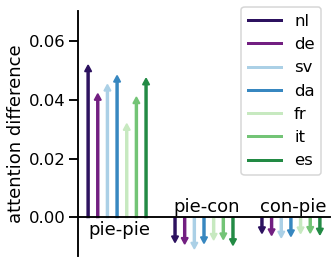

In [14]:
from matplotlib.lines import Line2D
sns.set_context("talk")

languages = ['nl', 'de', 'sv', 'da', 'fr', 'it', 'es']
attention_type = "attention"
setups = [("idi2idi", None, 0.14),
          ("idi2con", -0.0155, 0.009),
          ("con2idi", -0.0155, 0.009)]

x, y, style, colour, labels = [], [], [], [], []
for i, (setup, min_, max_) in enumerate(setups):
    for k, language in enumerate(languages):
        per_setup = pickle.load(open(f"data/{language}/{attention_type}.pickle", 'rb'))
        fig_par = [x for l in range(6) for x in per_setup[l][setup][("figurative", "paraphrase")] if not math.isnan(x)]
        lit_wfw = [x for l in range(6) for x in per_setup[l][setup][("literal", "word-by-word")] if not math.isnan(x)]
        a, b, c = np.percentile(fig_par, [25, 50, 75])
        d, e, f = np.percentile(lit_wfw, [25, 50, 75])
        x.append(i * (len(languages) + 2) + k)
        y.append(b - e)
        labels.append(language)

language_to_colour = {
    l: c for l, c in \
    zip(languages, sns.color_palette("magma", 5)[:2] + sns.color_palette("Blues", 2) + sns.color_palette("Greens", 3))}

fig, ax = plt.subplots(figsize=(4.5, 4.5))
for i, _ in enumerate(x):
    ax.arrow(x[i], 0 if y[i] > 0 else -0.0002, 0, # x start point
             y[i], # change in y
             head_width=0.7, # arrow head width
             head_length=0.04 * (abs(max_)*6), # arrow head length
             width=0.2, # arrow stem width
             fc=language_to_colour[labels[i]], #arrow fill color
             ec=language_to_colour[labels[i]]) # arrow edge color
sns.despine(top=True, right=True)
ax.spines['bottom'].set_position('zero')

xticks = []
for l in range(3):
    xticks.append(((l+1) * (len(languages)) + l*2) - len(languages)/2 - 0.5)

ax.set_xticks([])
ax.set_xticklabels([])
handles, labels = ax.get_legend_handles_labels()
custom_lines = [Line2D([0], [0], color=language_to_colour[l], lw=3) for l in languages]
ax.legend(custom_lines, languages, bbox_to_anchor=(1, 1.05))

plt.savefig(f"figures/languages_{attention_type}_{setup}.pdf", bbox_inches="tight")
plt.ylabel(r"attention difference")
plt.ylim(-0.013, 0.07)
plt.xlim(-1, 25)
plt.text(0, -0.006, "pie-pie")
plt.text(8.8, 0.002, "pie-con")
plt.text(17.8, 0.002, "con-pie")
plt.savefig("figures/attention_languages.pdf", bbox_inches="tight")
plt.show()

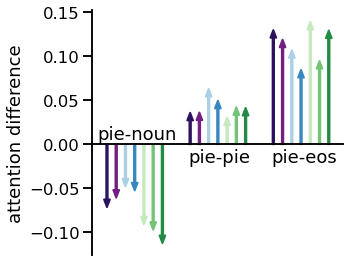

In [15]:
from matplotlib.lines import Line2D
sns.set_context("talk")

languages = ['nl', 'de', 'sv', 'da', 'fr', 'it', 'es']
attention_type = "cross_attention"
setups = [("idi2idi", None, 0.14),
          ("idi2con", None, 0.08),
          ("idi2eos", None, 0.08)]

x, y, style, colour, labels = [], [], [], [], []
for i, (setup, min_, max_) in enumerate(setups):
    
    for k, language in enumerate(languages):
        per_setup = pickle.load(open(f"data_precomputed/{language}/{attention_type}.pickle", 'rb'))
        fig_par = [x for l in range(6) for x in per_setup[l][setup][("figurative", "paraphrase")] if not math.isnan(x)]
        lit_wfw = [x for l in range(6) for x in per_setup[l][setup][("literal", "word-by-word")] if not math.isnan(x)]
        a, b, c = np.percentile(fig_par, [25, 50, 75])
        d, e, f = np.percentile(lit_wfw, [25, 50, 75])
        x.append(i * (len(languages) + 2) + k)
        y.append(b - e)
        labels.append(language)

language_to_colour = {
    l: c for l, c in \
    zip(languages, sns.color_palette("magma", 5)[:2] + sns.color_palette("Blues", 2) + sns.color_palette("Greens", 3))}

fig, ax = plt.subplots(figsize=(4.5, 4.5))
for i, _ in enumerate(x):
    ax.arrow(x[i], 0 if y[i] > 0 else -0.0002, 0, # x start point
             y[i], # change in y
             head_width=0.7, # arrow head width
             head_length=0.02 * (abs(max_)*6), # arrow head length
             width=0.2, # arrow stem width
             fc=language_to_colour[labels[i]], #arrow fill color
             ec=language_to_colour[labels[i]]) # arrow edge color
sns.despine(top=True, right=True)
ax.spines['bottom'].set_position('zero')

xticks = []
for l in range(3):
    xticks.append(((l+1) * (len(languages)) + l*2) - len(languages)/2 - 0.5)

ax.set_xticks([])
ax.set_xticklabels([])
handles, labels = ax.get_legend_handles_labels()
custom_lines = [Line2D([0], [0], color=language_to_colour[l], lw=3) for l in languages]
ax.legend([], [], frameon=False)

plt.savefig(f"figures/languages_{attention_type}_{setup}.pdf", bbox_inches="tight")
plt.ylabel(r"attention difference")
plt.text(-1, 0.006, "pie-noun")
plt.text(8.8, -0.02, "pie-pie")
plt.text(17.8, -0.02, "pie-eos")
plt.savefig("figures/cross_attention_languages.pdf", bbox_inches="tight")
plt.show()